In [98]:
import json
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.rcParams["font.family"] = 'NanumBarunGothic'

In [2]:
data = []
with open('data/train.jsonl', 'r', encoding='utf-8') as f:
    for line in f:
        data.append(line) 

In [13]:
train_dict = {}

for data_str in data:
    item = eval(data_str)
    train_dict[item["id"]] = {"media" : item["media"], 
                             "article_original" : item["article_original"],
                             "abs":item["abstractive"],
                             "ext":item["extractive"]}

## data 분포 

In [17]:
## train_data 
## 총 42,803개 
len(train_dict)

42803

In [107]:
## data 분포파악
## 주로 지역 언론사 위주
from collections import Counter

media = []
article_len = []
ext_pos = []
ext_pos_cnt = []

for item in train_dict.items():
    media.append(item[1]["media"])
    article_len.append(len(item[1]["article_original"]))
    ext_pos += item[1]["ext"]
    ext_pos_cnt.append(len(item[1]["ext"]))


Text(0.5, 1.0, '미디어 분포')

Text(0.5, 0, '미디어 명')

Text(0, 0.5, 'count')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], <a list of 11 Text xticklabel objects>)

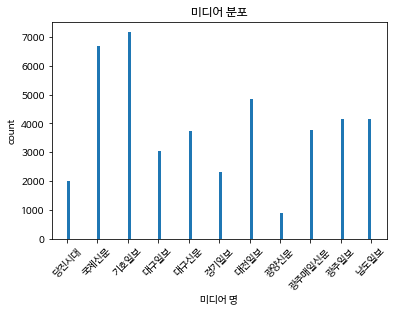

[('기호일보', 7166),
 ('국제신문', 6678),
 ('대전일보', 4831),
 ('광주일보', 4155),
 ('남도일보', 4148),
 ('광주매일신문', 3783),
 ('대구신문', 3750),
 ('대구일보', 3060),
 ('경기일보', 2319),
 ('당진시대', 2014),
 ('광양신문', 899)]

In [65]:
hist = plt.hist(media, bins=100)
plt.title("미디어 분포")
plt.xlabel("미디어 명")
plt.ylabel("count")
plt.xticks(rotation=45)
plt.show()

sorted(Counter(media).items(), key=lambda x: x[1], reverse=True)

Text(0.5, 1.0, '뉴스 평균 문장 길이')

Text(0.5, 0, '문장 길이')

Text(0, 0.5, 'count')

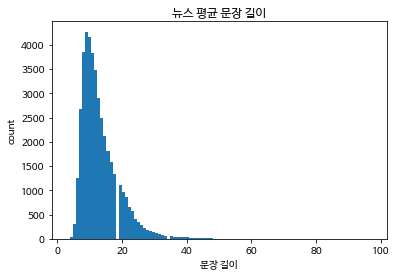

In [58]:
hist = plt.hist(article_len, bins=100, range=(min(article_len), max(article_len)))
plt.title("뉴스 길이(문장) 분포")
plt.xlabel("문장 길이")
plt.ylabel("count")

plt.show()

sorted(Counter(article_len).items(), key=lambda x: x[0], reverse=False)

Text(0.5, 1.0, '중요문장 위치 분포')

Text(0.5, 0, '중요문장 위치')

Text(0, 0.5, 'count')

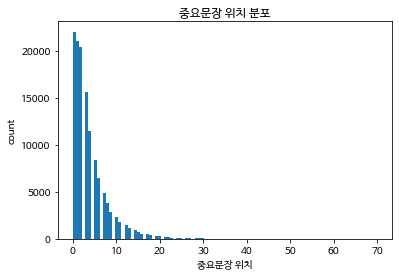

[(0, 21998),
 (1, 20959),
 (2, 20394),
 (3, 15551),
 (4, 11428),
 (5, 8358),
 (6, 6488),
 (7, 4840),
 (8, 3754),
 (9, 2800)]

In [109]:
hist = plt.hist(ext_pos, bins=100, range=(min(ext_pos), max(ext_pos)))
plt.title("중요문장 위치 분포")
plt.xlabel("중요문장 위치")
plt.ylabel("count")

plt.show()

sorted(Counter(ext_pos).items(), key=lambda x: x[0], reverse=False)[:10]

Text(0.5, 1.0, '아티클 당 중요문장 개수')

Text(0.5, 0, '중요문장 개수')

Text(0, 0.5, 'count')

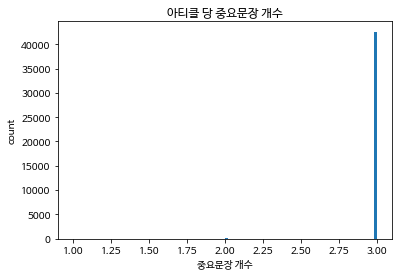

Counter({3: 42566, 2: 234, 1: 3})

In [113]:
### 중요문장이 대부분 3개이지만, 일부 기사의 경우 중요문장이 1,2개이다
# {3: 42566, 2: 234, 1: 3}

hist = plt.hist(ext_pos_cnt, bins=100, range=(min(ext_pos_cnt), max(ext_pos_cnt)))
plt.title("아티클 당 중요문장 개수")
plt.xlabel("중요문장 개수")
plt.ylabel("count")

plt.show()

Counter(ext_pos_cnt)

## 중요문장이 뒤에 있는 경우
- 어떤 케이스인지

In [119]:
id_list =[]
ext_last_pos =[]

for item in train_dict.items():
    id_list.append(item[0])
    ext_last_pos.append(max(item[1]["ext"]))
    
position_info = pd.DataFrame()
position_info["id"] = id_list
position_info["len"] = article_len
position_info["ext_last_pos"] = ext_last_pos
position_info["last_pos_ratio"] = position_info.apply(lambda x : np.round(x["ext_last_pos"]/x["len"], 2), axis=1)
position_info["ext_pos_cnt"] = ext_pos_cnt

In [105]:
position_info.sort_values("last_pos_ratio")

,id,len,ext_last_pos,last_pos_ratio
4015,278256836,27,0,0.00
36550,324595593,4,0,0.00
38337,332326394,58,2,0.03
41460,341529607,49,2,0.04
26642,335717360,25,1,0.04
...,...,...,...,...
23204,331381869,42,41,0.98
6322,342212089,43,42,0.98
15606,367175136,46,45,0.98
36401,333899022,71,70,0.99


In [127]:
position_info[position_info["ext_pos_cnt"]<=2]

,id,len,ext_last_pos,last_pos_ratio,ext_pos_cnt
89,367848773,11,10,0.91,2
99,334118395,22,21,0.95,2
117,365742373,9,8,0.89,2
332,333372417,19,7,0.37,2
776,335300796,14,4,0.29,2
...,...,...,...,...,...
41807,356944586,7,2,0.29,2
41832,342807815,14,3,0.21,2
42592,362663056,19,14,0.74,2
42713,333262874,33,29,0.88,2


### raw 데이터확인 

In [128]:
id_ = "356944586"

print("article : \n", train_dict[id_]["article_original"])
print("\nabstractive : \n", train_dict[id_]["abs"])
print("\nextractive : \n", [x for idx_, x in enumerate(train_dict[id_]["article_original"]) if idx_ in train_dict[id_]["ext"]])
print("\n",train_dict[id_]["ext"])

article : 
 ['가평교육지원청과 가평군은 가평혁신교육지구 사업으로 사제동행 역사·독서 기행 해외 답사 프로그램으로 ‘가평의 아이들 윤동주, 이회영, 안중근을 만나다’ 프로그램을 지난 13일부터 17일까지 중국 옌지(延吉), 퉁화(通化), 단둥(丹東), 뤼순(旅順), 다롄(大連) 등지에서 4박 5일 동안 진행했다고 20일 밝혔다.', '이번 프로그램은 관내 중고등학교의 공모를 거쳐 조종중·고등학교 학생 39명과 인솔 교사 6명, 학교와 교육지원청 관계자 3명으로 진행됐다.', '가평교육지원청과 조종중·고등학교는 국어 역사 지리 음악 과목 교사들이 협력해 교과 융합 프로젝트수업을 구성했고 지난 6월부터 학교에서 독립운동 관련 독서활동과 독립운동 관련 교과융합 프로젝트를 진행했다.', '국내 독립운동 유적답사(윤동주·김구·윤봉길·이봉창)를 진행하면서 일제강점기 빼앗긴 조국을 되찾기 위해 헌신하신 많은 독립지사들의 정신을 배우려고 노력해왔다.', '특히 13일부터 진행하는 중국독립운동 유적 답사는 조종중고 교사들이 직접 답사 자료집을 제작해 활동에 사용했다.', '가평교육지원청은 답사를 다녀온 후 관내 중·고등학교 학생들에게 답사보고회를 운영해 답사를 통해 배운 것을 유튜브 동영상과 UCC 등으로 만들어 가평 관내 여러 학교와 공유할 예정이다.', '중국독립운동유적답사를 기획한 가평교육지원청 이동준 장학사는 "학생들이 중국독립운동 유적답사를 통해 빼앗긴 조국을 되찾기 위해 헌신했던 독립투사들의 마음을 배우기를 바란다"며 "최근 대한민국과 일본 사이에 과거사 문제를 둘러싸고 벌어지고 있는 상황에서 나라를 사랑한다는 것이 어떤 의미인지를 깊이 생각해보는 시간이 되기를 기대한다"고 말했다.']

abstractive : 
 가평교육지원청과 가평균은 가평혁신교육지구 사업의 일환으로 사제동행 해외 답사 프로그램 '가평의 아이들 윤동주, 이회영, 안중근을 만나다'에 총 48명이 참석하여 중국 옌지, 퉁화, 단둥 등을 방문했다.

extractive : 
 ['이번 프로

### Idea
- 기관명 / 인용문

In [1]:
from konlpy.tag import Mecab
mecab = Mecab()